# Олеся Карпіна та Дарина Шевчук 

## Task 1.2. Bellman-Ford and Floyd-Warshall Algorithm's analysis

In [52]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm
# !pip install pandas
# !pip install numpy
# !pip install graphviz
# !pip install scikit-learn

# !pip install graphviz
# !pip install pydotplus
# !pip install notebook

In [53]:
import random
import time
import math
from tqdm import tqdm

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, groupby

from networkx.algorithms import tree
from networkx.algorithms import bellman_ford_predecessor_and_distance
from networkx.algorithms import floyd_warshall_predecessor_and_distance

import numpy.typing as npt

Generating graph

In [54]:

# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

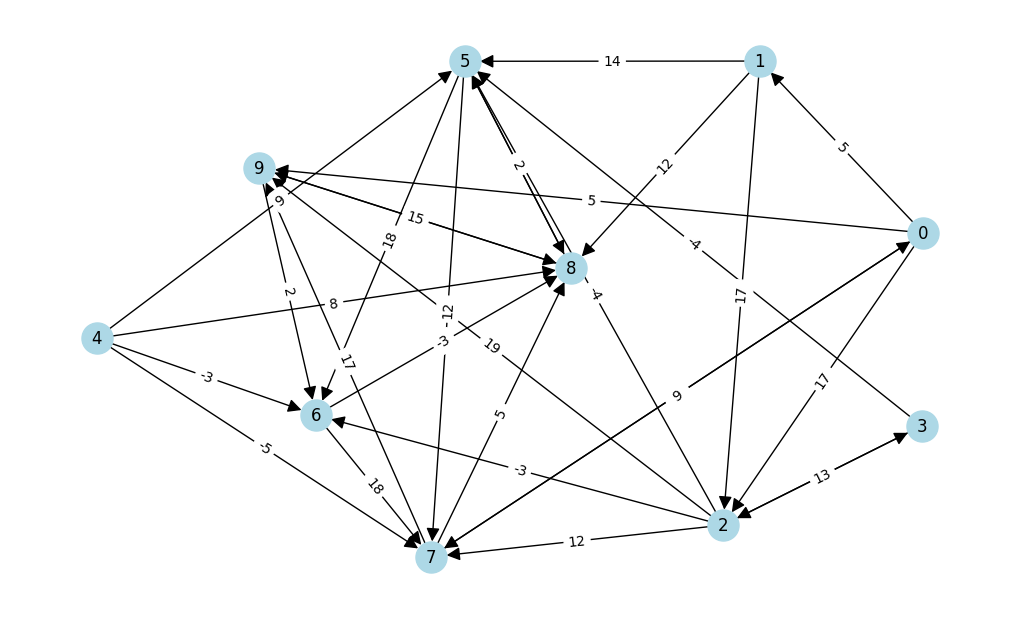

In [55]:
G = gnp_random_connected_graph(10, 0.5, True, True)

### Bellman-Ford algorithm

In [56]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Distance to 0: 0
Distance to 1: 5
Distance to 2: 17
Distance to 7: 12
Distance to 9: 5
Distance to 5: 6
Distance to 8: 4
Distance to 3: 24
Distance to 6: 7


The interpretetion of Bellman-Fords's algorithm (Варіант 1 з лекції - версія коли відсутні прості цикли відємної довжини)

In [57]:
def ford_algorythm(G, start_node):
    edges = list(G.edges(data=True))
    nodes = list(G.nodes())
    d_of_weights = {}
    for note_from, note_to, weight in edges:
        d_of_weights[(note_from,note_to)] = weight['weight']     
    d_of_distances = {}

    # ----init (step 1)----
    for node in nodes : 
        if node == start_node:
            d_of_distances[node] = 0;
        elif (start_node, node) in d_of_weights : 
            d_of_distances[node] = d_of_weights[(start_node, node)]
        else :
            d_of_distances[node] = float('inf')

    # ---- core part of algo (iteration) ---
    for k in range (1, len(nodes)-2):
        for node1 in nodes:
            if node1 != start_node :
                for node2 in nodes:
                    if (node2, node1) in d_of_weights :
                        d_of_distances[node1] = min(d_of_distances[node1], d_of_distances[node2]+d_of_weights[(node2,node1)])   
    return d_of_distances

In [58]:
try:
    d = ford_algorythm(G, 0)
    for k, v in d.items():
        if v != float('inf'):
            print(f"Distance to {k}:", v)

except:
    print("Negative cycle detected")

Distance to 0: 0
Distance to 1: 5
Distance to 2: 17
Distance to 3: 24
Distance to 5: 6
Distance to 6: 7
Distance to 7: 12
Distance to 8: 4
Distance to 9: 5


Comparison of our two algorithms: my interpretation of Bellman-Fords`s algorithm and built-in Bellman-Fords`s algorithm

Negative cycle detected_ford_build_in
Negative cycle detected_ford_build_in
Negative cycle detected_ford_build_in
Negative cycle detected_ford_build_in
Negative cycle detected_ford_build_in
Negative cycle detected_ford_build_in
Negative cycle detected_ford_build_in


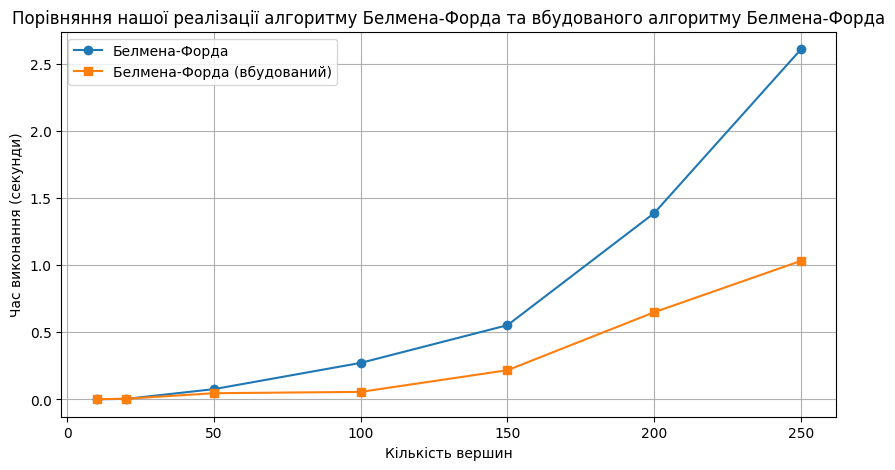

In [59]:
sizes = [10, 20, 50, 100, 150, 200, 250]
bell_times = []
bell_build_in_times = []

for size in sizes:
    G = gnp_random_connected_graph(size, 0.5, False)

    start = time.time()
    try:
        ford_algorythm(G, 0)
    except:
        print("Negative cycle detected_ford")
    bell_times.append(time.time() - start)

    start = time.time()
    try:
        bellman_ford_predecessor_and_distance(G, 0)
    except:
        print("Negative cycle detected_ford_build_in")
    bell_build_in_times.append(time.time() - start)

plt.figure(figsize=(10, 5))
plt.plot(sizes, bell_times, marker='o', label='Белмена-Форда')
plt.plot(sizes, bell_build_in_times, marker='s', label='Белмена-Форда (вбудований)')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (секунди)')
plt.legend()
plt.title('Порівняння нашої реалізації алгоритму Белмена-Форда та вбудованого алгоритму Белмена-Форда')
plt.grid()
plt.show()

### Порівняння роботи алгоритмів Белмана-Форда

Короткий підсумок для кожного експерименту

Для малих графів (до 20 вершин)
Наша реалізація працює трохи швидше за networkx (наприклад наш 0,1мс повірвняно з 0,3мс networkx для 10 вершин), оскільки виконує менше додаткових перевірок (наприклад на прості цикли відємної довжини). 
Також наш код є простий та практично невимагає ніякої підготовки (що як правило потрібна для швидких алгоритмів)
Час виконання обох алгоритмів знаходиться в межах ≤1 мс.

Для середніх графів (100-300 вершин)
networkx працює значно швидше за нашу реалізацію. Складність нашого алгоритму (перебор всіх варіантів) є О(n^3) - що значно більше ніж типових швидких імплементацій. 
Час роботи networkx зростає також не лінійно (близько до O(n)..O(n^2)), але це невидно, оскільки є нелінійний елемент завершення викониння при наявності циклу відємної довжини).
(З опису networkx - The algorithm has a running time of  О(m*n) where n is the number of nodes and m is the number of edges. It also can handle negative edge weights)

Для великих графів (400-500 вершин)
наша реалізація показує значне зростання часу виконання - що і передбачалося при такій реалізації.


### Загальний підсумок по алгоритмах Белмана-Форда
✅ Де наша реалізація працює найкраще:
Для дуже малих графів (≤20 вершин), де алгоритм повного перебору виконується швидше ніж підготовчі дії вбудованого швидкого алгоритму. 

❌ Де наша реалізація працює набагато повільніше:
Для середніх та великих графів (≥20 вершин), оскільки використовується алгоритм на основі перебору всіх варіантів з складністю є О(n^3) та не робиться перевірки на прості цикли відємної довжини.


Висновок:
Якщо потрібно обробляти великі графи, слід використовувати швидкі алгоритми з можливістю завчасного припинення виконання при наявності простих циклів відємної довжини. 
Алгоритм Варіант 1 (або на базі повного перебору всіх варіантів) може мати сенс коли відсутні прости цикли відємної довжини, графи є відносно невиликі та потрібно мати лаконічний код (що займає менше памяті та легко-швидко можна написати) 

### Floyd-Warshall algorithm

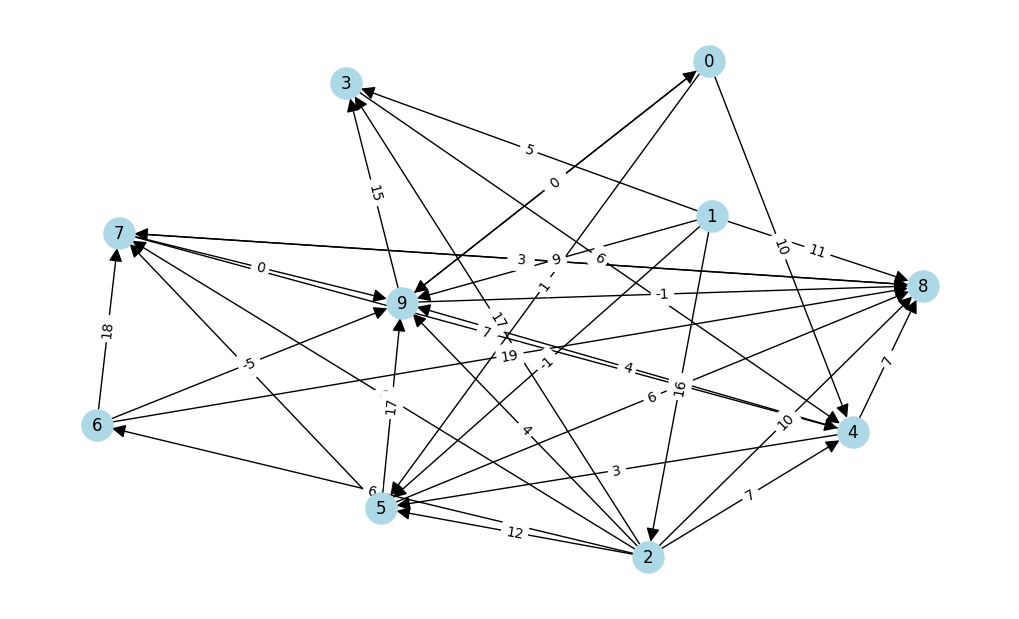

In [60]:
G = gnp_random_connected_graph(10, 0.5, True, True)

In [61]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 4: 10, 5: 1, 9: 5, 1: inf, 2: inf, 3: 20, 6: inf, 7: 5, 8: 4}
Distances with 1 source: {1: 0, 9: 3, 2: 16, 3: 5, 5: -1, 8: 2, 0: 3, 4: 10, 6: 22, 7: 3}
Distances with 2 source: {2: 0, 8: -1, 3: 15, 4: 7, 5: 1, 6: 6, 7: 0, 9: 0, 0: 0, 1: inf}
Distances with 3 source: {3: 0, 4: 6, 0: 10, 1: inf, 2: inf, 5: 9, 6: inf, 7: 12, 8: 9, 9: 10}
Distances with 4 source: {4: 0, 5: 3, 8: 3, 9: 4, 0: 4, 1: inf, 2: inf, 3: 19, 6: inf, 7: 6}
Distances with 5 source: {5: 0, 9: 4, 7: 4, 8: 3, 0: 4, 1: inf, 2: inf, 3: 19, 4: 11, 6: inf}
Distances with 6 source: {6: 0, 9: -5, 7: -3, 8: -6, 0: -5, 1: inf, 2: inf, 3: 10, 4: 4, 5: -4}
Distances with 7 source: {7: 0, 4: 7, 8: -1, 9: 0, 0: 0, 1: inf, 2: inf, 3: 15, 5: 1, 6: inf}
Distances with 8 source: {8: 0, 7: 3, 0: 3, 1: inf, 2: inf, 3: 18, 4: 10, 5: 4, 6: inf, 9: 3}
Distances with 9 source: {9: 0, 0: 0, 3: 15, 8: -1, 1: inf, 2: inf, 4: 9, 5: 1, 6: inf, 7: 2}


The interpretetion of Floyd-Warshall's algorithm (з перевіркою на наявностість простих циклів відємної довжини) - розроблено по опису з лекцій

In [62]:
def floyd_algorythm(G):
    edges = list(G.edges(data=True))
    nodes = list(G.nodes())
     # --- step one - init ---
    matrix_of_distances = [[float('inf')  for _ in range(len(nodes))] for _ in range(len(nodes))]
    for note_from, note_to, weight in edges:
        matrix_of_distances[nodes.index(note_from)][nodes.index(note_to)] = weight['weight']
    for i in range(len(nodes)):
        matrix_of_distances[i][i]=0

    # step two - core part of algo
    def w_floyd(i,j,k):
        if k>0:
            w = min(w_floyd(i,k-1,k-1)+w_floyd(k-1,j,k-1), w_floyd(i,j,k-1))
            if i == j:
                if w < 0:
                    raise Exception("Negative cycle detected")
        else:
            w = matrix_of_distances[i][j]
        return w

    #for k in range (len(nodes)):
    for i in range (len(nodes)):
        for j in range (len(nodes)):
            matrix_of_distances[i][j] = w_floyd(i,j,len(nodes))
    
    # format result to dic of dic (similar to networkx build in implementation) 
    d_result = {}
    d_result_value = {}
    for node_1_ind, node_1 in enumerate(nodes):
        for node_2_ind, node_2 in enumerate(nodes):
            d_result_value[node_2] = matrix_of_distances[node_1_ind][node_2_ind]
        d_result[node_1] = d_result_value
        d_result_value = {}
    return d_result

In [63]:
try:
    dist = floyd_algorythm(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))

except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 1: inf, 2: inf, 3: 20, 4: 10, 5: 1, 6: inf, 7: 5, 8: 4, 9: 5}
Distances with 1 source: {0: 3, 1: 0, 2: 16, 3: 5, 4: 10, 5: -1, 6: 22, 7: 3, 8: 2, 9: 3}
Distances with 2 source: {0: 0, 1: inf, 2: 0, 3: 15, 4: 7, 5: 1, 6: 6, 7: 0, 8: -1, 9: 0}
Distances with 3 source: {0: 10, 1: inf, 2: inf, 3: 0, 4: 6, 5: 9, 6: inf, 7: 12, 8: 9, 9: 10}
Distances with 4 source: {0: 4, 1: inf, 2: inf, 3: 19, 4: 0, 5: 3, 6: inf, 7: 6, 8: 3, 9: 4}
Distances with 5 source: {0: 4, 1: inf, 2: inf, 3: 19, 4: 11, 5: 0, 6: inf, 7: 4, 8: 3, 9: 4}
Distances with 6 source: {0: -5, 1: inf, 2: inf, 3: 10, 4: 4, 5: -4, 6: 0, 7: -3, 8: -6, 9: -5}
Distances with 7 source: {0: 0, 1: inf, 2: inf, 3: 15, 4: 7, 5: 1, 6: inf, 7: 0, 8: -1, 9: 0}
Distances with 8 source: {0: 3, 1: inf, 2: inf, 3: 18, 4: 10, 5: 4, 6: inf, 7: 3, 8: 0, 9: 3}
Distances with 9 source: {0: 0, 1: inf, 2: inf, 3: 15, 4: 9, 5: 1, 6: inf, 7: 2, 8: -1, 9: 0}


Comparison of our two algorithms: my interpretation of Floyd-Warshall`s algorithm and built-in Floyd-Warshall algorithm

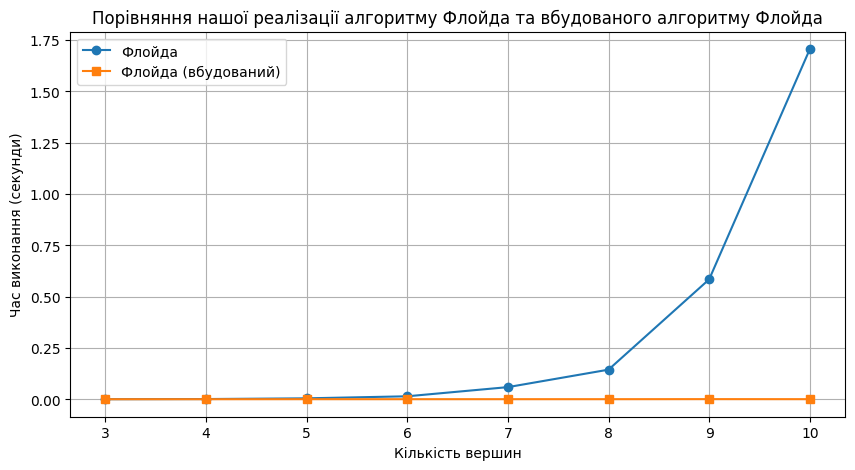

In [65]:
sizes = [3, 4, 5, 6, 7, 8, 9, 10]
#sizes = [13, 20, 350]
floyd_times = []
floyd_build_in_times = []

for size in sizes:
    G = gnp_random_connected_graph(size, 0.5, False)

    start = time.time()
    try:
        floyd_algorythm(G)
    except:
        print("Negative cycle detected floyd")
    floyd_times.append(time.time() - start)

    start = time.time()
    try:
        floyd_warshall_predecessor_and_distance(G)
    except:
        print("Negative cycle detected floyd_build_in")
    floyd_build_in_times.append(time.time() - start)

plt.figure(figsize=(10, 5))
plt.plot(sizes, floyd_times, marker='o', label='Флойда')
plt.plot(sizes, floyd_build_in_times, marker='s', label='Флойда (вбудований)')
plt.xlabel('Кількість вершин')
plt.ylabel('Час виконання (секунди)')
plt.legend()
plt.title('Порівняння нашої реалізації алгоритму Флойда та вбудованого алгоритму Флойда')
plt.grid()
plt.show()

### Порівняння роботи алгоритмів Флойда

Короткий підсумок для кожного експерименту

Для малих графів (до 10 вершин)
Наша реалізація працює значно повільніше за networkx. З networkx документації Floyd’s algorithm running time is O(n^3) with running space of O(n^2)
Наш код (що базується на матеріалах лекції) - також має складність O(n^3), але базується на рекурсії. Гіпотеза чого наш значно повільніший (хоча теоретична складність та сама) те що ми не зберігаємо обраховані знвчення k-1, а все робимо через рекурсивні функції,
що приводить до значного сповільнення через значну кількість викликів рекурсивних функцій, і як результат обмеженяня памяті чи тощо. 


Для середніх графів (10-500 вершин) 
networkx імплементація давала результат в межах кількох десятків секунд, наша вимагала вже значно більшого часу (практично не можливо було дочекатися оскільки час зростав експоненційно). 


Для великих графів (> 500 вершин)
networkx імплементація вимагала вже достатньо великого часу на виконання. Наша імплементація вже не видавала результату.


## Загальний підсумок:

Вибраний алгоритм та його імплементація значно впливають на час розвязку задачі. З алгоритмів що ми досліджували, алгоритм Белмана-Форда працює найшвидше, особливо це відчутно на великих графах. Складність networkx імплементації близько до O(n*m), наша імплементація на основі повного перебору і алгоритми Флойда при складності O(n^3) вже суттєво показували зростання часу виконання на великих графіх. Хоча на малих працювали достатньо добре. Використання рекурсії в алгоритмі Флойда призводили до значного зростання часу викониння навіть на відносно малих граах (більше 10 вершин).

---